In [61]:
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [62]:
df_raw = pd.read_csv('loan_data_2007_2014.csv', index_col=0)

C:\Users\user\AppData\Local\Temp\ipykernel_11248\313185557.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('loan_data_2007_2014.csv', index_col=0)


In [63]:
pd.set_option('display.max_columns', None)
df_raw.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df_raw.shape

(466285, 74)

In [65]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [66]:
df_raw.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
168342,3221004,3963976,6250,6250,6225.0,36 months,15.31,217.61,C,C2,reno cycles & gears,< 1 year,RENT,23000.0,Not Verified,Feb-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 01/23/13 > i plain on cons...,debt_consolidation,credit debt,895xx,NV,20.5,0.0,Dec-05,0.0,NaN,NaN,6.0,0.0,14240,77.8,9.0,f,0.0,0.0,7523.08125,7492.99,6250.0,1273.08,0.0,0.0,0.0,Nov-14,3172.2,NaN,Nov-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,14240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18300.0,NaN,NaN,NaN


In [67]:
df_raw.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 466285 non-null  object
 1   grade                466285 non-null  object
 2   sub_grade            466285 non-null  object
 3   emp_title            438697 non-null  object
 4   emp_length           445277 non-null  object
 5   home_ownership       466285 non-null  object
 6   verification_status  466285 non-null  object
 7   issue_d              466285 non-null  object
 8   loan_status          466285 non-null  object
 9   pymnt_plan           466285 non-null  object
 10  url                  466285 non-null  object
 11  desc                 125983 non-null  object
 12  purpose              466285 non-null  object
 13  title                466265 non-null  object
 14  zip_code             466285 non-null  object
 15  addr_state           466285 non-nu

In [68]:
df_raw.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   int_rate                     466285 non-null  float64
 6   installment                  466285 non-null  float64
 7   annual_inc                   466281 non-null  float64
 8   dti                          466285 non-null  float64
 9   delinq_2yrs                  466256 non-null  float64
 10  inq_last_6mths               466256 non-null  float64
 11  mths_since_last_delinq       215934 non-null  float64
 12  mths_since_last_record       62638 non-null   float64
 13 

In [69]:
print(df_raw.select_dtypes(exclude='object').nunique())

id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
int_rate                          506
installment                     55622
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
out_prncp_inv                  141189
total_pymnt                    351609
total_pymnt_inv                347659
total_rec_prncp                172713
total_rec_int                  270249
total_rec_late_fee               5808
recoveries                      22773
collection_r

In [70]:
print(df_raw.select_dtypes(include='object').nunique())

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
desc                   124436
purpose                    14
title                   63099
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
next_pymnt_d              100
last_credit_pull_d        103
application_type            1
dtype: int64


In [71]:
print(df_raw.columns[df_raw.isnull().all()])
print(len(df_raw.columns[df_raw.isnull().all()]))

Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')
17


In [72]:
column_to_drop = [
    'id', 
    'member_id', 
    'url', 
    'desc',
    'zip_code', 
    'annual_inc_joint', 
    'dti_joint', 
    'verification_status_joint',
    'open_acc_6m', 'open_il_6m', 
    'open_il_12m', 'open_il_24m',
    'mths_since_rcnt_il', 
    'total_bal_il', 
    'il_util', 
    'open_rv_12m',
    'open_rv_24m', 
    'max_bal_bc', 
    'all_util', 
    'inq_fi', 
    'total_cu_tl',
    'inq_last_12m',
    'sub_grade'
]

df_new = df_raw.drop(column_to_drop, axis=1)

In [73]:
df_new.sample(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
283230,25000,25000,25000.0,60 months,24.08,720.37,F,Truck Driver,4 years,MORTGAGE,80000.0,Not Verified,Oct-14,Fully Paid,n,small_business,Business,TX,16.47,0.0,Apr-82,0.0,NaN,NaN,11.0,0.0,12805,43.4,33.0,w,0.00,0.00,26583.47,26583.47,25000.00,1583.47,0.0,0.0,0.0,Feb-15,25209.62,NaN,Nov-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,138655.0,29500.0
88902,12250,12250,12250.0,60 months,24.08,352.98,F,state of hawaii,5 years,OWN,35000.0,Verified,Sep-13,Current,n,home_improvement,bathroom remodel,HI,26.13,0.0,Jan-05,3.0,NaN,NaN,6.0,0.0,7710,56.3,9.0,f,8458.96,8458.96,9530.16,9530.16,3791.04,5739.12,0.0,0.0,0.0,Jan-16,352.98,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,21480.0,13700.0


#### Cleaning Data

In [74]:
df_new['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [75]:
df_new['emp_length_int'] = df_new['emp_length'].str.replace(r'(\+|<| years?|\s)', '', regex=True).fillna(0).astype(int)

In [76]:
df_new['emp_length_int'] = df_new['emp_length_int'].astype(float)

In [77]:
df_new.drop('emp_length', axis=1, inplace=True)

In [78]:
df_new.sample(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_length_int
91148,25000,25000,25000.0,36 months,22.70,963.84,E,Marco Polo,MORTGAGE,72000.0,Verified,Sep-13,Fully Paid,n,other,Extra Funding,IL,2.88,0.0,Nov-98,3.0,61.0,62.0,15.0,1.0,6044,20.9,39.0,f,0.0,0.0,32875.63114,32875.63,25000.0,7875.63,0.000000,0.0,0.0,Jul-15,8782.43,NaN,Jan-16,0.0,61.0,1,INDIVIDUAL,0.0,0.0,6044.0,28900.0,8.0
225006,12000,12000,11950.0,36 months,13.11,404.97,B,Costco,MORTGAGE,71000.0,Verified,Mar-12,Fully Paid,n,debt_consolidation,Debt Consolidation,CA,2.84,0.0,Nov-93,0.0,36.0,NaN,6.0,0.0,7307,75.3,16.0,f,0.0,0.0,14647.46932,14586.45,12000.0,2607.08,40.389044,0.0,0.0,Mar-15,1267.92,NaN,Mar-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,10.0


In [79]:
df_new['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [80]:
df_new['term_int'] = df_new['term'].str.extract(r'(\d+)').astype(int)

In [81]:
df_new.drop('term', axis=1, inplace=True)

In [82]:
df_new.sample(2)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_length_int,term_int
213508,6075,6075,6075.0,13.99,207.60,C,Scottsdale Schools,RENT,42000.0,Source Verified,Jun-12,Fully Paid,n,small_business,Business,AZ,18.33,1.0,Mar-06,0.0,19.0,89.0,3.0,1.0,1175,69.1,9.0,f,0.00,0.00,7263.526976,7263.53,6075.00,1188.53,0.0,0.0,0.0,Jun-14,22.36,NaN,Feb-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,10.0,36
413463,21000,21000,20950.0,18.92,543.83,D,Physical Therapist Assistant,MORTGAGE,99100.0,Not Verified,Apr-14,Current,n,debt_consolidation,Debt consolidation,MD,12.82,2.0,Oct-96,1.0,16.0,NaN,12.0,0.0,28456,86.2,21.0,f,15752.72,15715.21,11420.430000,11393.24,5247.28,6173.15,0.0,0.0,0.0,Jan-16,543.83,Feb-16,Jan-16,0.0,16.0,1,INDIVIDUAL,0.0,0.0,298675.0,33000.0,9.0,60


In [83]:
df_new['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [84]:
df_new = df_new.assign(earliest_cr_line_date=pd.to_datetime(df_new['earliest_cr_line'], format='%b-%y'))

df_new = df_new.assign(mths_since_earliest_cr_line=((pd.to_datetime('2017-12-01') - df_new['earliest_cr_line_date']) / pd.Timedelta(days=30)).round())

In [85]:
print(df_new['earliest_cr_line_date'].head(2))
print(df_new['mths_since_earliest_cr_line'].head(2))

print(df_new['mths_since_earliest_cr_line'].describe())

0   1985-01-01
1   1999-04-01
Name: earliest_cr_line_date, dtype: datetime64[ns]
0    401.0
1    227.0
Name: mths_since_earliest_cr_line, dtype: float64
count    466256.000000
mean        242.979220
std          95.344015
min        -621.000000
25%         186.000000
50%         228.000000
75%         289.000000
max         596.000000
Name: mths_since_earliest_cr_line, dtype: float64


In [86]:
df_new.loc[df_new['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df_new['mths_since_earliest_cr_line'].max()

In [87]:
df_new.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

In [88]:
df_new.sample(2)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_length_int,term_int,mths_since_earliest_cr_line
18730,14400,14400,14325.0,7.66,448.99,A,Controlled Automation,MORTGAGE,90000.0,Source Verified,Mar-11,Fully Paid,n,car,Motorcycle,AR,12.23,0.0,0.0,NaN,NaN,8.0,0.0,29518,51.3,19.0,f,0.00,0.00,15528.12,15447.25,14399.99,1128.13,0.0,0.0,0.0,Jun-12,9283.18,NaN,Jul-12,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,9.0,36,159.0
111869,15000,15000,15000.0,15.22,358.59,C,American Wire & Cable Company,RENT,38480.0,Verified,Aug-13,Current,n,debt_consolidation,ahomeformykids,OH,28.50,0.0,0.0,41.0,103.0,12.0,1.0,9748,43.5,19.0,f,9147.61,9147.61,10390.89,10390.89,5852.39,4538.50,0.0,0.0,0.0,Jan-16,358.59,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,23142.0,22400.0,10.0,60,266.0


In [89]:
df_new['issue_d_date'] = pd.to_datetime(df_new['issue_d'], format='%b-%y')
df_new['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df_new['issue_d_date']) / np.timedelta64(1, 'M')))

In [90]:
df_new['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [91]:
df_new.sample(2)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_length_int,term_int,mths_since_earliest_cr_line,issue_d_date,mths_since_issue_d
246471,21000,21000,21000.0,9.49,672.60,B,Database Administrator 3,MORTGAGE,90000.0,Source Verified,Nov-14,Current,n,credit_card,Credit card refinancing,GA,18.93,0.0,0.0,NaN,NaN,17.0,0.0,35453,65.8,28.0,w,14093.48,14093.48,8732.73000,8732.73,6906.52,1826.21,0.0,0.0,0.0,Jan-16,672.6,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,239215.0,53900.0,4.0,36,227.0,2014-11-01,37.0
128141,18000,18000,18000.0,14.33,421.92,C,US Army,RENT,42000.0,Verified,Jun-13,Fully Paid,n,debt_consolidation,Debt consolidation,LA,9.56,0.0,0.0,43.0,NaN,11.0,0.0,1226,4.8,41.0,f,0.00,0.00,18695.92726,18695.93,18000.00,695.93,0.0,0.0,0.0,Feb-14,2164.6,NaN,Oct-15,0.0,49.0,1,INDIVIDUAL,0.0,0.0,14552.0,25800.0,10.0,60,186.0,2013-06-01,54.0


In [92]:
df_new['last_pymnt_d_date'] = pd.to_datetime(df_new['last_pymnt_d'], format='%b-%y')
df_new['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df_new['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

df_new['next_pymnt_d_date'] = pd.to_datetime(df_new['next_pymnt_d'], format='%b-%y')
df_new['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df_new['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

df_new['last_credit_pull_d_date'] = pd.to_datetime(df_new['next_pymnt_d'], format='%b-%y')
df_new['mths_last_credit_pull_d_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df_new['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [93]:
print(df_new['mths_since_last_pymnt_d'].describe())
print(df_new['mths_since_next_pymnt_d'].describe())
print(df_new['mths_last_credit_pull_d_date'].describe())

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64
count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64
count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_last_credit_pull_d_date, dtype: float64


In [94]:
df_new.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)
df_new.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)
df_new.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)
df_new.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

### Correlation Check

C:\Users\user\AppData\Local\Temp\ipykernel_11248\2832793637.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr())


<Axes: >

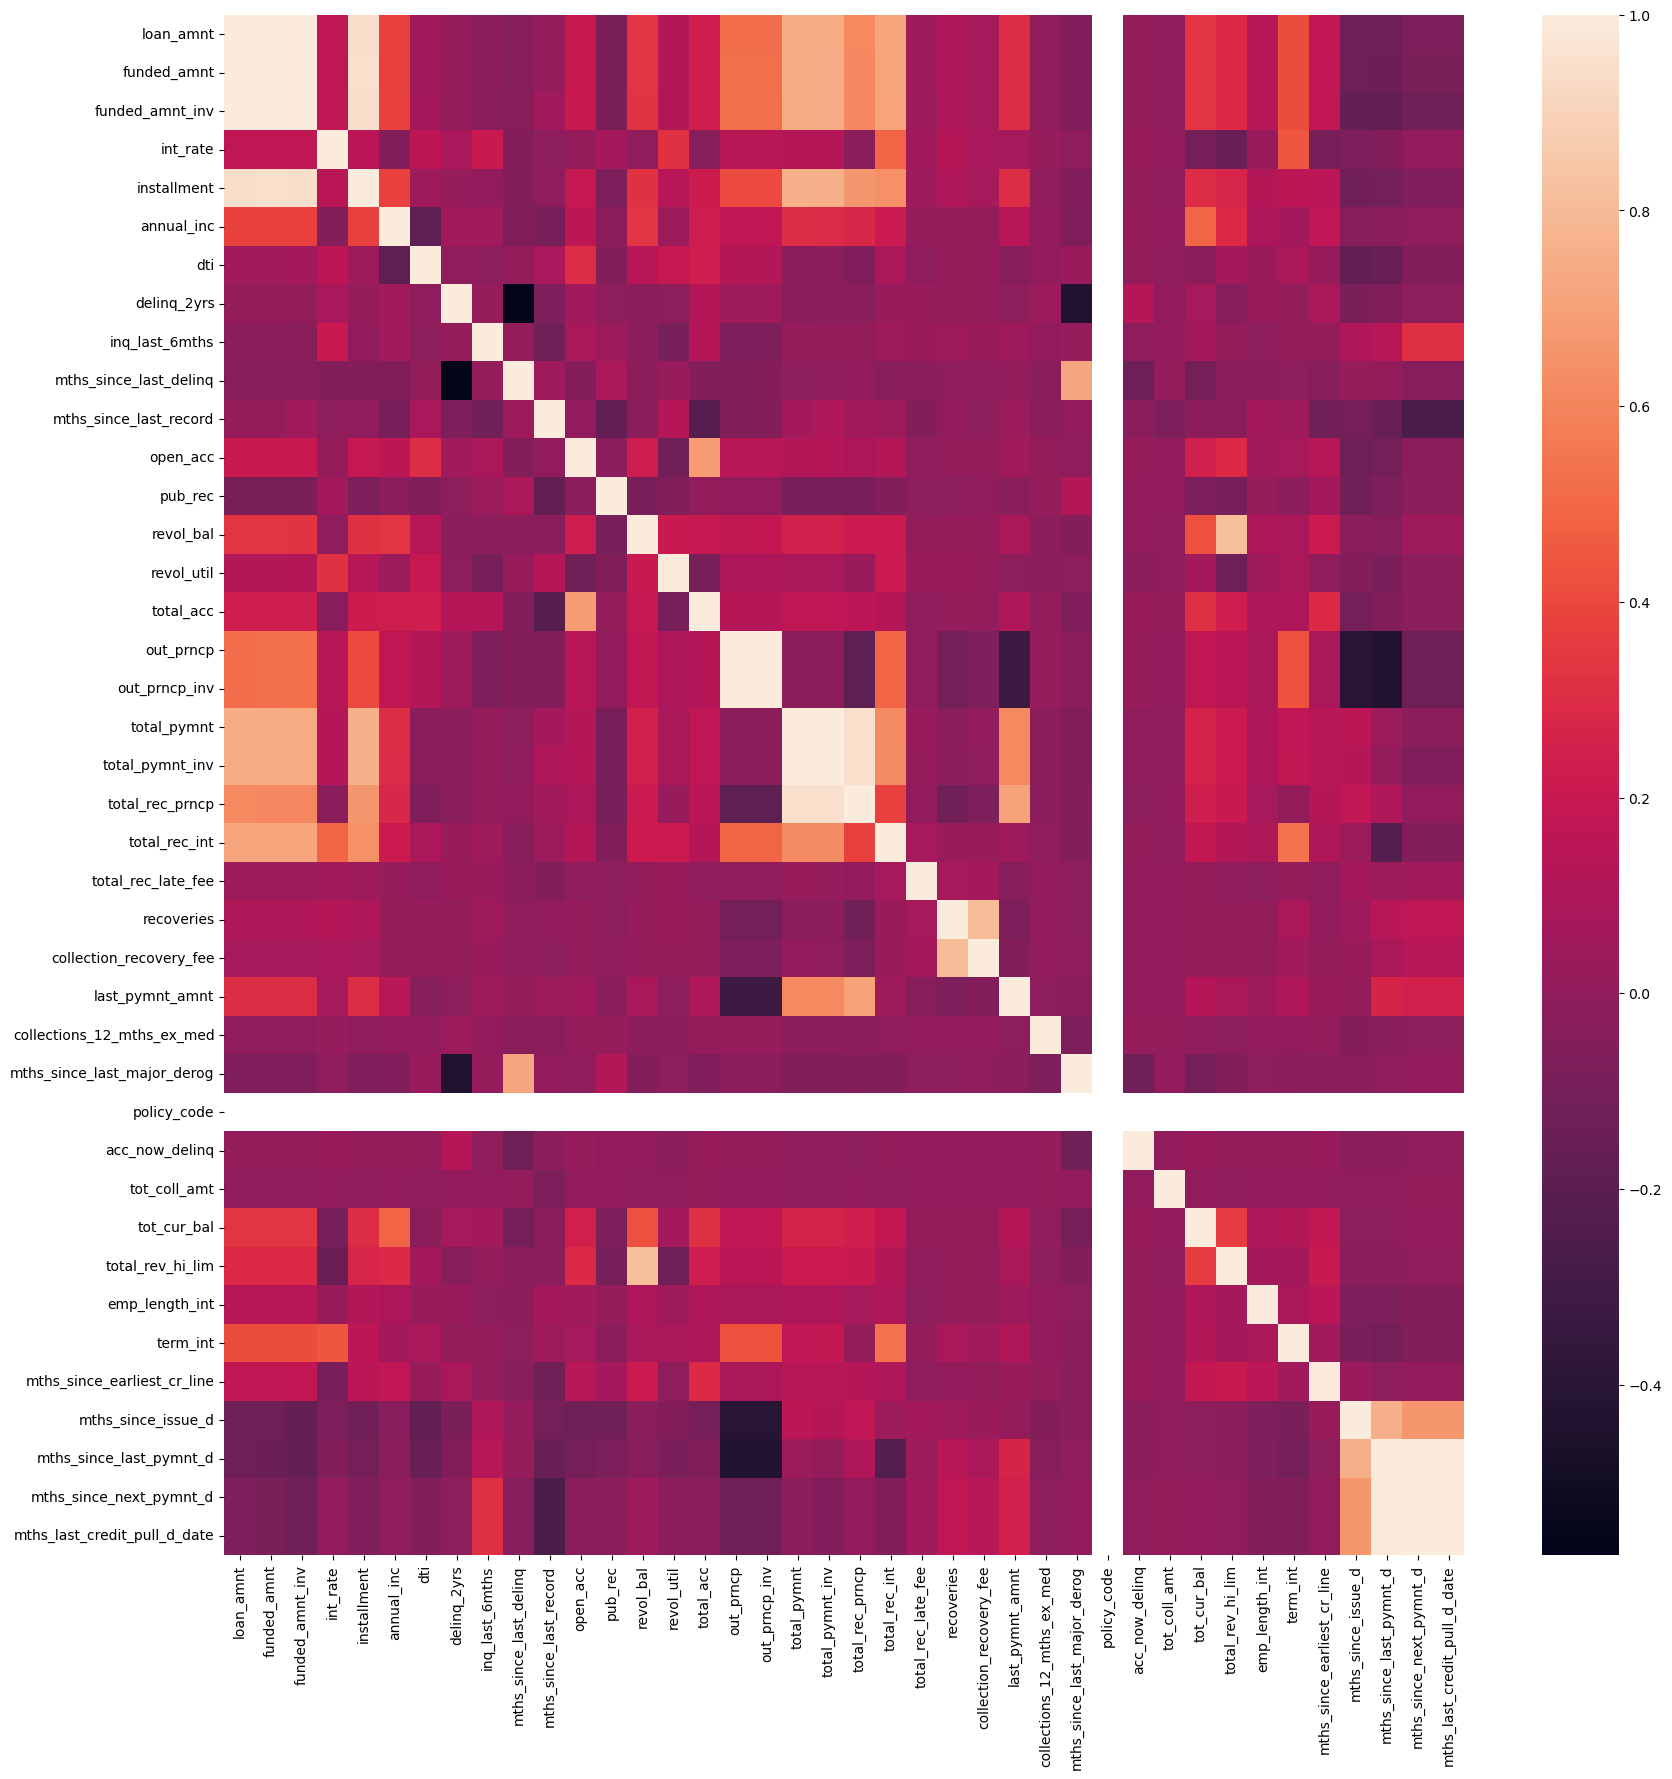

In [95]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr())

In [96]:
corr_matrix = df_new.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\user\AppData\Local\Temp\ipykernel_11248\2410198987.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_new.corr().abs()


In [97]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_last_credit_pull_d_date']

In [98]:
df_new.drop(to_drop_hicorr, axis=1, inplace=True)

# Define Target

In [99]:
df_new.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [100]:
status_mapping = {
    'Charged Off': 1,
    'Default': 1,
    'Does not meet the credit policy. Status:Charged Off': 1,
    'Late (31-120 days)': 1,
}

df_new['bad_flag'] = df_new['loan_status'].map(status_mapping).fillna(0).astype(int)

In [101]:
df_new['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

In [102]:
df_new.drop('loan_status', axis=1, inplace=True)

In [103]:
df_new.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [104]:
df_new.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [105]:
df_new.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       509
mths_since_issue_d                 91
bad_flag                            2
dtype: int64

In [106]:
df_new.drop(['policy_code'], axis=1, inplace=True)

### Analisis Frekuensi Relatif

In [107]:
for col in df_new.select_dtypes(include='object').columns.tolist():
    print(df_new[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

pymnt_plan didominasi oleh 1 nilai saja, maka drop saja kolom tersebut

In [108]:
df_new.drop('pymnt_plan', axis=1, inplace=True)

## Missing Value

In [109]:
check_missing = df_new.isnull().mean() * 100
missing_columns = check_missing[check_missing > 0].sort_values(ascending=False)
print(missing_columns)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64


Kolom diatas 75% dibuang

In [110]:
df_new.drop('mths_since_last_record', axis=1, inplace=True)

In [111]:
df_new.sample(1)

,loan_amnt,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,bad_flag
93181,15000,13.68,C,RENT,54000.0,Not Verified,debt_consolidation,FL,24.36,0.0,0.0,NaN,9.0,0.0,13976,73.2,15.0,f,0.0,0.0,0.0,0.0,0.0,0.0,26547.0,1.0,36,109.0,51.0,0


In [112]:
for col in df_new.select_dtypes(exclude='object'):
    df_new[col] = df_new[col].fillna(df_new[col].median())
df_new.isnull().sum()

loan_amnt                      0
int_rate                       0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
total_rec_late_fee             0
recoveries                     0
collections_12_mths_ex_med     0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
emp_length_int                 0
term_int                       0
mths_since_earliest_cr_line    0
mths_since_issue_d             0
bad_flag                       0
dtype: int

In [113]:
for col in df_new.select_dtypes(include='object'):
    df_new[col] = df_new[col].fillna(df_new[col].mode().iloc[0])
df_new.isnull().sum()

loan_amnt                      0
int_rate                       0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
total_rec_late_fee             0
recoveries                     0
collections_12_mths_ex_med     0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
emp_length_int                 0
term_int                       0
mths_since_earliest_cr_line    0
mths_since_issue_d             0
bad_flag                       0
dtype: int

In [114]:
df_new.sample(4)

,loan_amnt,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,bad_flag
6855,12000,16.77,D,MORTGAGE,44004.0,Verified,home_improvement,MT,14.29,0.0,2.0,45.0,6.0,0.0,0,0.0,11.0,f,0.0,0.0,768.31,0.0,0.0,0.0,81539.0,1.0,36,152.0,75.0,1
392696,14000,8.39,A,RENT,83000.0,Not Verified,credit_card,MD,13.25,1.0,0.0,3.0,9.0,0.0,15317,54.9,14.0,f,0.0,0.0,0.00,0.0,0.0,0.0,42573.0,3.0,36,125.0,43.0,0
72070,6075,9.99,B,MORTGAGE,34000.0,Not Verified,debt_consolidation,AR,8.05,0.0,0.0,31.0,6.0,1.0,7099,39.4,17.0,f,0.0,0.0,0.00,0.0,0.0,0.0,7099.0,10.0,36,206.0,50.0,0
164198,18000,20.49,E,RENT,52000.0,Verified,debt_consolidation,WA,20.63,0.0,0.0,49.0,9.0,0.0,26996,92.1,29.0,f,0.0,0.0,2066.68,0.0,0.0,0.0,26996.0,2.0,60,339.0,58.0,1


### Feature Scaling and Transformation

In [115]:
categorical_cols = [col for col in df_new.select_dtypes(include='object').columns.tolist()]

In [116]:
onehot = pd.get_dummies(df_new[categorical_cols], drop_first=True)

In [117]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Standardization

In [118]:
numerical_cols = [col for col in df_new.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [119]:
print(numerical_cols)

['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'emp_length_int', 'term_int', 'mths_since_earliest_cr_line', 'mths_since_issue_d']


In [120]:
ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df_new[numerical_cols]), columns=numerical_cols)

In [121]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896549,1.328632,-0.357012,0.178920,-0.096479,-1.641544,-0.31429,-0.124888,1.160093,-1.384880,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,1.151811,-0.616225,1.767844,1.446626
1,-1.426088,0.330634,-0.787386,-2.065791,-0.357012,3.843328,-0.096479,-1.641544,-0.31429,-0.703378,-1.971760,-1.815923,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.343273,-1.316991,1.622784,-0.215740,1.446626
2,-1.438156,0.488979,-1.110292,-1.082491,-0.357012,1.095022,-0.096479,-1.842050,-0.31429,-0.642003,1.783934,-1.298671,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,1.151811,-0.616225,-0.569137,1.446626
3,-0.521001,-0.077850,-0.438061,0.354248,-0.357012,0.178920,0.171958,-0.238000,-0.31429,-0.514224,-1.482803,1.028959,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,1.151811,-0.616225,0.228857,1.446626
4,-1.365749,-0.261438,0.122313,0.091865,-0.357012,-0.737182,0.373285,0.764532,-0.31429,0.558748,-0.096020,1.115168,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,-1.316991,1.622784,0.240257,1.446626


In [122]:
data_model = pd.concat([onehot, std, df_new[['bad_flag']]], axis=1)

In [123]:
data_model.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,bad_flag
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.124392,-0.729587,-0.896549,1.328632,-0.357012,0.178920,-0.096479,-1.641544,-0.31429,-0.124888,1.160093,-1.384880,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,1.151811,-0.616225,1.767844,1.446626,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.426088,0.330634,-0.787386,-2.065791,-0.357012,3.843328,-0.096479,-1.641544,-0.31429,-0.703378,-1.971760,-1.815923,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.343273,-1.316991,1.622784,-0.215740,1.446626,1
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.438156,0.488979,-1.110292,-1.082491,-0.357012,1.095022,-0.096479,-1.842050,-0.31429,-0.642003,1.783934,-1.298671,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,1.151811,-0.616225,-0.569137,1.446626,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.521001,-0.077850,-0.438061,0.354248,-0.357012,0.178920,0.171958,-0.238000,-0.31429,-0.514224,-1.482803,1.028959,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,1.151811,-0.616225,0.228857,1.446626,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.365749,-0.261438,0.122313,0.091865,-0.357012,-0.737182,0.373285,0.764532,-0.31429,0.558748,-0.096020,1.115168,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.343273,-1.316991,1.622784,0.240257,1.446626,0


### Training

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

In [125]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
X_train.shape, X_test.shape

((373028, 99), (93257, 99))

In [127]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [128]:
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

### Validation

In [136]:
y_pred_proba = log_reg.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

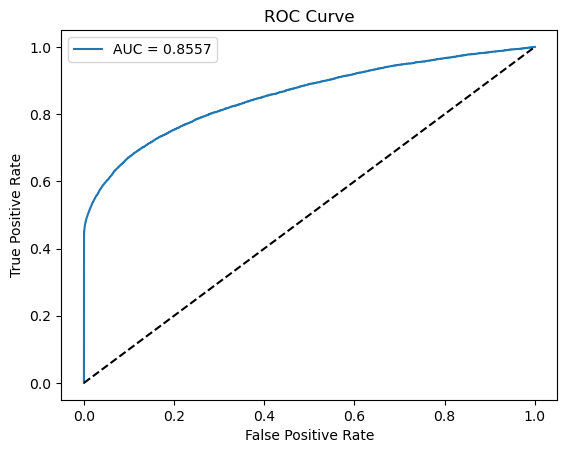

In [137]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [145]:
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_prob))


ROC AUC Score:
0.8556597283347411


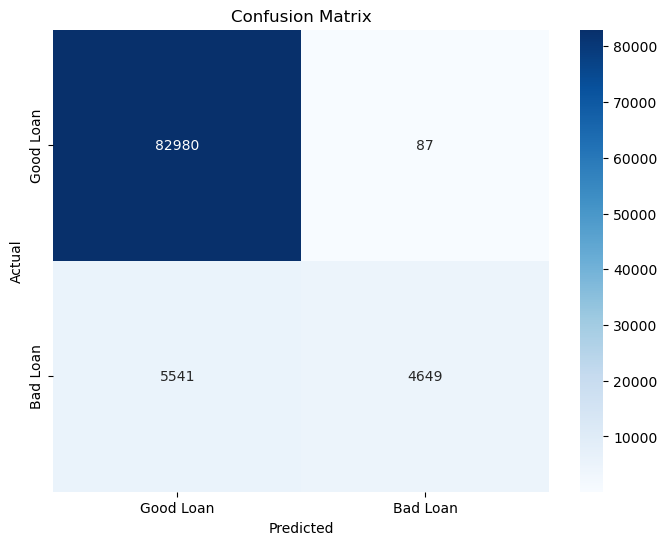

In [141]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Good Loan', 'Bad Loan'], yticklabels=['Good Loan', 'Bad Loan'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [142]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83067
           1       0.98      0.46      0.62     10190

    accuracy                           0.94     93257
   macro avg       0.96      0.73      0.80     93257
weighted avg       0.94      0.94      0.93     93257



In [143]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.9396506428471857


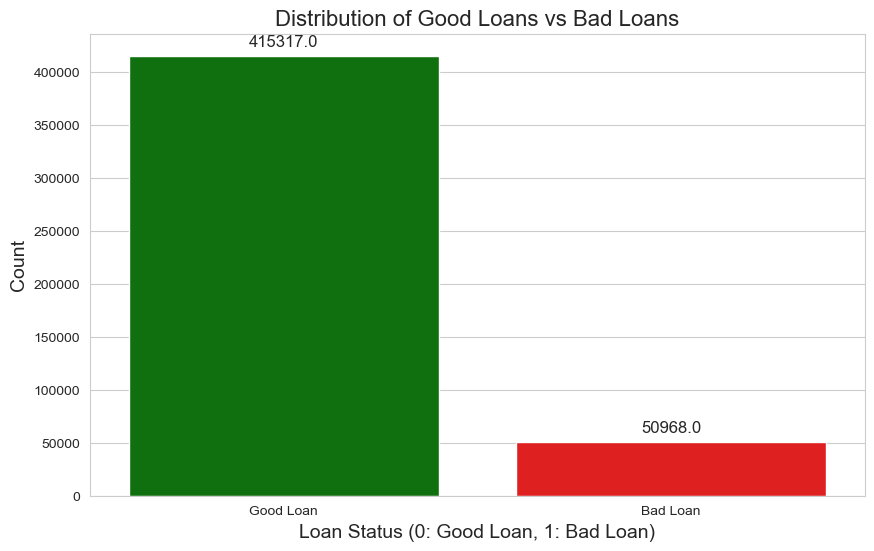

In [158]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot the count of bad loans vs good loans
sns.countplot(x='bad_flag', data=df_new, palette=['green', 'red'])
plt.title('Distribution of Good Loans vs Bad Loans', fontsize=16)
plt.xlabel('Loan Status (0: Good Loan, 1: Bad Loan)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Good Loan', 'Bad Loan'])

# Add labels above bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Show plot
plt.show()

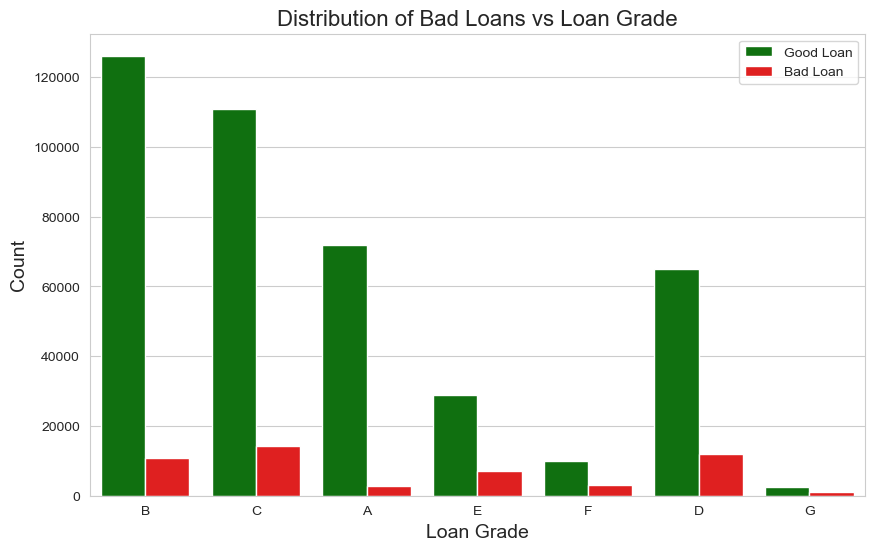

In [159]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot the count of bad loans vs loan grade
p = sns.countplot(x='grade', hue='bad_flag', data=df_new, palette=['green', 'red'])
plt.title('Distribution of Bad Loans vs Loan Grade', fontsize=16)
plt.xlabel('Loan Grade', fontsize=14)
legend_labels, _= p.get_legend_handles_labels()
p.legend(legend_labels,['Good Loan', 'Bad Loan'])
plt.ylabel('Count', fontsize=14)

# Show plot
plt.show()

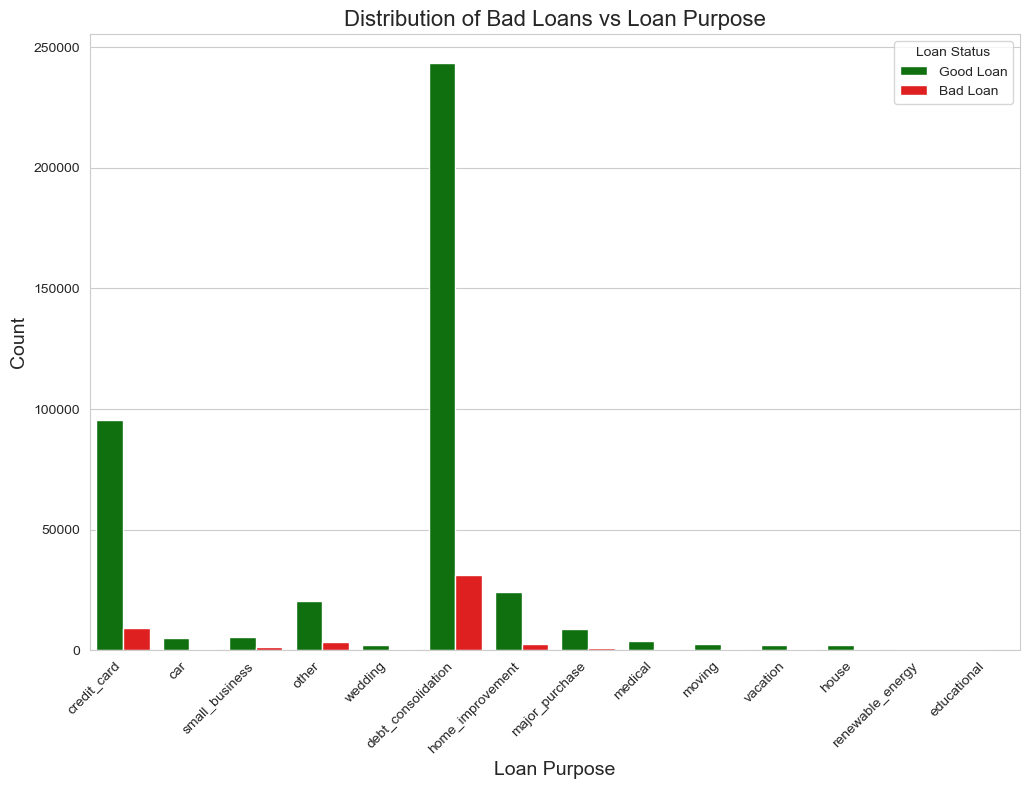

In [160]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plot the count of bad loans vs loan purpose
sns.countplot(x='purpose', hue='bad_flag', data=df_new, palette=['green', 'red'])
plt.title('Distribution of Bad Loans vs Loan Purpose', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adjust legend
plt.legend(title='Loan Status', labels=['Good Loan', 'Bad Loan'])

# Show plot
plt.show()

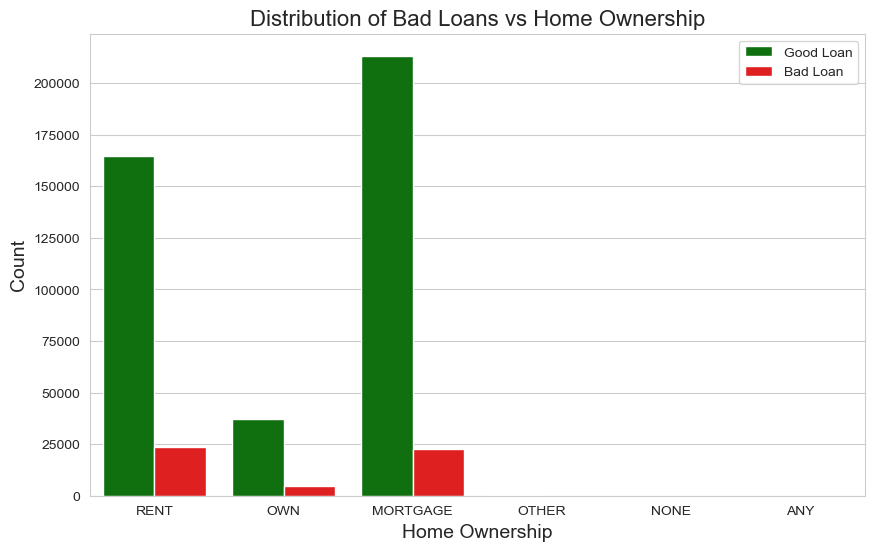

In [162]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot the count of bad loans vs home ownership
p = sns.countplot(x='home_ownership', hue='bad_flag', data=df_new, palette=['green', 'red'])
plt.title('Distribution of Bad Loans vs Home Ownership', fontsize=16)
plt.xlabel('Home Ownership', fontsize=14)
legend_labels, _= p.get_legend_handles_labels()
p.legend(legend_labels,['Good Loan', 'Bad Loan'])
plt.ylabel('Count', fontsize=14)

# Show plot
plt.show()